<a href="https://colab.research.google.com/github/HyunChanKim/Data-Science-Study-Archive/blob/main/3_1_K_nearest_neighbors_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

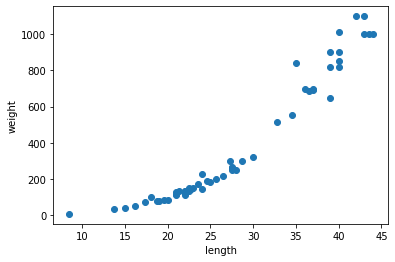

In [42]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42) #여기서는 농어의 무게를 타깃값으로 삼았다. 인풋과 타깃이 둘다 1차원배열의 데이터이다.

In [44]:
#사이킷런에 사용할 훈련세트는 2차원 배열이어야한다. 그래서 변환이 필요하다 현재는 1차원배열의 데이터이다.
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [45]:
# (2,2)크기로 변환해보자
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [46]:
print(train_input.shape) #train_input은 농어 길이값의 훈련세트
print(test_input.shape)

(42,)
(14,)


In [47]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [48]:
print(train_input)
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [49]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [50]:
knr.score(test_input,test_target) #R^2 -> 결정계수 수치. 나름 높은 정확도를 보여주고있다.

0.992809406101064

In [52]:
from sklearn.metrics import mean_absolute_error #사이킷런 서브패키지 매트릭스 아래의 민 앱솔루트 에러 측정도구를 임포트
test_prediction = knr.predict(test_input) #테스트세트 예측값들을 테스트 프레딕션 변수에 지정
mae = mean_absolute_error(test_target, test_prediction) #각각의 타깃과 예측의 절댓값오차들의 평균을 반환 -> 즉 예측값과 타깃값은 평균적으로 어느정도수치가 다른가?
print(mae)

19.157142857142862


In [53]:
print(test_prediction)
print(test_target) #훈련셋으로 등록된 데이터를 기반으로 시행된 예측값과 실제 예측 타깃값의 비교

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


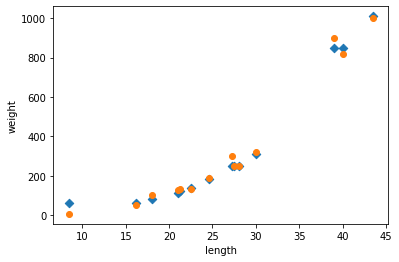

In [56]:
plt.scatter(test_input, test_prediction,marker="D") #예측수치 산점도
plt.scatter(test_input, test_target) #실제 타깃값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#시각화를 통해 어느정도 비슷하게 예측중인 것을 알 수 있다.

In [58]:
knr.score(train_input,train_target) #훈련세트 점수가 더 낮다 = 과소적합(underfitting)이 일어났다. = 일반적으로 데이터세트의 크기가 작아서 발생하고, 훈련세트가 더 잘 맞지 못했다.

0.9698823289099254

In [60]:
#모델을 좀 더 복잡하게 만들어보자 - k최근접이웃 알고리즘의 이웃의 개수 줄이기
knr.n_neighbors = 3
knr.fit(train_input,train_target)
knr.score(train_input, train_target)
#예측값의 오차들의 줄어들었음을 알 수 있다.

0.9804899950518966

In [61]:
knr.score(test_input, test_target) #과소적합문제해결 - 테스트점수가 훈련점수보다 낮아짐.

0.9746459963987609

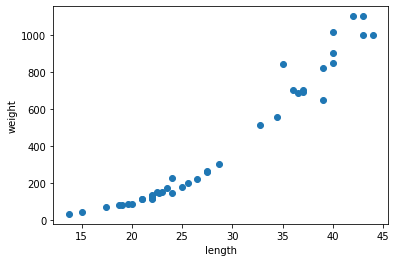

In [62]:
plt.scatter(train_input,train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

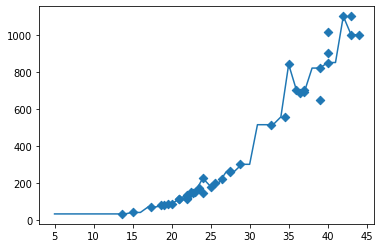

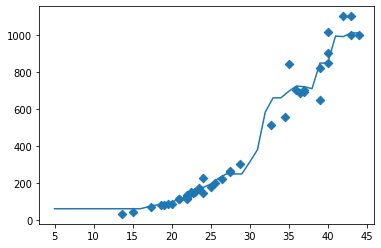

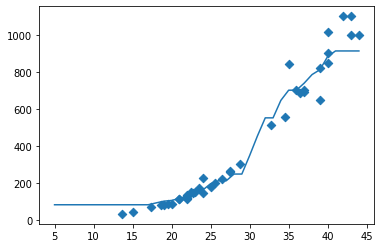

In [67]:
#k-최근접이웃 - 이웃매개변수 개수조절에 따른 모델의 복잡,단순도 변화 확인
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1) #1차원의 열로된 5~44까지의 배열을 생성하여 x변수에 지정해준다.

for n in [1, 5, 10]: #1,5,10의 이웃을 가질때의 변화 관측
  knr.n_neighbors = n
  knr.fit(train_input,train_target)
  prediction = knr.predict(x) #x값 각각은 테스트 인풋값(특성데이터)이다.기존 train_input 훈련데이터를 기반으로 x의 회귀값을 측정한 것을 prediction변수에 지정한다.
  #변화를 확인해보자
  plt.scatter(train_input,train_target,marker='D')
  plt.plot(x,prediction)
  plt.show()
  #위에서부터 아래로 1개, 5개, 10개의 이웃을 가질 때의 예측값의 그래프변화이다. 이웃의 개수가 적을때는 미시적패턴, 많아 질 수록 거시적패턴을 따라가는 형태이다.